In [1]:
import pandas as pd

In [2]:
from urllib.request import urlretrieve

# Data Extraction

In [3]:
urlretrieve('https://covid.ourworldindata.org/data/owid-covid-data.csv', 'all_world_covid_data.csv')

('all_world_covid_data.csv', <http.client.HTTPMessage at 0x7f972dc02340>)

In [4]:
df = pd.read_csv('all_world_covid_data.csv')

In [5]:
covid_df = df[df.location == 'India']

In [6]:
covid_df = covid_df[['date', 'new_cases', 'new_deaths', 'new_tests']]

In [7]:
covid_df.to_csv('covid_india.csv',index=None)

# Data Analysis

In [8]:
covid_df = pd.read_csv('covid_india.csv')

In [9]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2020-01-30,1.0,NaN,NaN
1,2020-01-31,0.0,NaN,NaN
2,2020-02-01,0.0,NaN,NaN
3,2020-02-02,1.0,NaN,NaN
4,2020-02-03,1.0,NaN,NaN
...,...,...,...,...
440,2021-04-14,200739.0,1038.0,1411758.0
441,2021-04-15,217353.0,1185.0,1384549.0
442,2021-04-16,234692.0,1341.0,1473210.0
443,2021-04-17,261394.0,1501.0,NaN


In [10]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        445 non-null    object 
 1   new_cases   445 non-null    float64
 2   new_deaths  404 non-null    float64
 3   new_tests   376 non-null    float64
dtypes: float64(3), object(1)
memory usage: 14.0+ KB


In [11]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,445.000000,404.000000,3.760000e+02
mean,33846.752809,442.497525,6.864455e+05
std,38840.145864,373.347053,4.187911e+05
min,0.000000,-1.000000,1.570000e+02
25%,5050.000000,118.000000,2.273108e+05
50%,20021.000000,354.500000,7.770235e+05
75%,51596.000000,702.000000,1.057874e+06
max,273802.000000,2003.000000,1.492409e+06


In [12]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [13]:
covid_df.new_tests.first_valid_index()

49

In [14]:
covid_df.loc[47:51]

,date,new_cases,new_deaths,new_tests
47,2020-03-17,23.0,1.0,NaN
48,2020-03-18,14.0,0.0,NaN
49,2020-03-19,38.0,1.0,191.0
50,2020-03-20,50.0,1.0,1060.0
51,2020-03-21,86.0,-1.0,1325.0


In [15]:
first_test_date = covid_df['date'][49]
print(f"Number of tests started being recorded from {first_test_date}")

Number of tests started being recorded from 2020-03-19


In [16]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()
total_tests = covid_df.new_tests.sum()

In [17]:
print(f"Total number of reported cases in India: {int(total_cases)}")
print(f"Total number of reported deaths in India: {int(total_deaths)}")

Total number of reported cases in India: 15061805
Total number of reported deaths in India: 178769


In [18]:
death_rate = total_deaths / total_cases

In [19]:
print(f"Death rate in India : {death_rate*100:.4f} %")

Death rate in India : 1.1869 %


In [20]:
positive_rate = total_cases / total_tests

In [21]:
print(f"{positive_rate*100:.4f}% tests in India led to positive diagnosis.")

5.8356% tests in India led to positive diagnosis.


In [22]:
high_new_cases = covid_df.new_cases > 50000

In [23]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
440     True
441     True
442     True
443     True
444     True
Name: new_cases, Length: 445, dtype: bool

In [24]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
180,2020-07-28,51596.0,785.0,528082.0
181,2020-07-29,50294.0,762.0,408855.0
182,2020-07-30,52783.0,763.0,446642.0
183,2020-07-31,61242.0,793.0,642588.0
184,2020-08-01,54735.0,853.0,525689.0
...,...,...,...,...
440,2021-04-14,200739.0,1038.0,1411758.0
441,2021-04-15,217353.0,1185.0,1384549.0
442,2021-04-16,234692.0,1341.0,1473210.0
443,2021-04-17,261394.0,1501.0,NaN


In [25]:
positive_rate

0.05835567495054446

In [26]:
high_ratio_df = covid_df[covid_df.new_cases/covid_df.new_tests > positive_rate]

In [27]:
high_ratio_df

,date,new_cases,new_deaths,new_tests
49,2020-03-19,38.0,1.0,191.0
51,2020-03-21,86.0,-1.0,1325.0
54,2020-03-24,37.0,0.0,157.0
67,2020-04-06,1190.0,37.0,11534.0
80,2020-04-19,1893.0,38.0,29463.0
...,...,...,...,...
438,2021-04-12,161736.0,879.0,1180136.0
439,2021-04-13,184372.0,1027.0,1400122.0
440,2021-04-14,200739.0,1038.0,1411758.0
441,2021-04-15,217353.0,1185.0,1384549.0


###### The days when the ratio of cases reported to tests conducted is higher than the overall positive_rate.

In [28]:
covid_df.new_cases/covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
440    0.142191
441    0.156985
442    0.159307
443         NaN
444         NaN
Length: 445, dtype: float64

In [29]:
covid_df['positive_rate'] = covid_df.new_cases/covid_df.new_tests

In [30]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2020-01-30,1.0,NaN,NaN,NaN
1,2020-01-31,0.0,NaN,NaN,NaN
2,2020-02-01,0.0,NaN,NaN,NaN
3,2020-02-02,1.0,NaN,NaN,NaN
4,2020-02-03,1.0,NaN,NaN,NaN
...,...,...,...,...,...
440,2021-04-14,200739.0,1038.0,1411758.0,0.142191
441,2021-04-15,217353.0,1185.0,1384549.0,0.156985
442,2021-04-16,234692.0,1341.0,1473210.0,0.159307
443,2021-04-17,261394.0,1501.0,NaN,NaN


Data of Positive rate per day is highly inaccurate as the results of the tests take a few days time to come. Hence its better to drop the 'positive_rate' column.

In [31]:
covid_df.drop(columns=['positive_rate'], inplace=True)

In [32]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2020-01-30,1.0,NaN,NaN
1,2020-01-31,0.0,NaN,NaN
2,2020-02-01,0.0,NaN,NaN
3,2020-02-02,1.0,NaN,NaN
4,2020-02-03,1.0,NaN,NaN
...,...,...,...,...
440,2021-04-14,200739.0,1038.0,1411758.0
441,2021-04-15,217353.0,1185.0,1384549.0
442,2021-04-16,234692.0,1341.0,1473210.0
443,2021-04-17,261394.0,1501.0,NaN


In [33]:
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
444,2021-04-18,273802.0,1619.0,NaN
443,2021-04-17,261394.0,1501.0,NaN
442,2021-04-16,234692.0,1341.0,1473210.0
441,2021-04-15,217353.0,1185.0,1384549.0
440,2021-04-14,200739.0,1038.0,1411758.0
439,2021-04-13,184372.0,1027.0,1400122.0
437,2021-04-11,168912.0,904.0,1412047.0
438,2021-04-12,161736.0,879.0,1180136.0
436,2021-04-10,152879.0,839.0,1173219.0
435,2021-04-09,145384.0,794.0,1364205.0


In [34]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
138,2020-06-16,10974.0,2003.0,146936.0
444,2021-04-18,273802.0,1619.0,NaN
443,2021-04-17,261394.0,1501.0,NaN
442,2021-04-16,234692.0,1341.0,1473210.0
229,2020-09-15,90123.0,1290.0,1072845.0
232,2020-09-18,93337.0,1247.0,1006615.0
224,2020-09-10,96551.0,1209.0,1129756.0
225,2020-09-11,97570.0,1201.0,1163542.0
441,2021-04-15,217353.0,1185.0,1384549.0
244,2020-09-30,86821.0,1181.0,1086688.0


In [35]:
covid_df[['new_cases','new_deaths','new_tests']].lt(0).any()

new_cases     False
new_deaths     True
new_tests     False
dtype: bool

There is/are negative values in 'new_deaths' columns

In [36]:
covid_df[covid_df.new_deaths < 0]

,date,new_cases,new_deaths,new_tests
51,2020-03-21,86.0,-1.0,1325.0


In [37]:
covid_df.loc[49:53]

,date,new_cases,new_deaths,new_tests
49,2020-03-19,38.0,1.0,191.0
50,2020-03-20,50.0,1.0,1060.0
51,2020-03-21,86.0,-1.0,1325.0
52,2020-03-22,66.0,3.0,1298.0
53,2020-03-23,103.0,3.0,3708.0


In [38]:
covid_df.at[51,'new_deaths'] = (covid_df.at[50,'new_deaths'] + covid_df.at[52,'new_deaths'])/2

In [39]:
covid_df.loc[49:53]

,date,new_cases,new_deaths,new_tests
49,2020-03-19,38.0,1.0,191.0
50,2020-03-20,50.0,1.0,1060.0
51,2020-03-21,86.0,2.0,1325.0
52,2020-03-22,66.0,3.0,1298.0
53,2020-03-23,103.0,3.0,3708.0


The negative value is replaced with the average of the value above and below it.

In [40]:
covid_df.date

0      2020-01-30
1      2020-01-31
2      2020-02-01
3      2020-02-02
4      2020-02-03
          ...    
440    2021-04-14
441    2021-04-15
442    2021-04-16
443    2021-04-17
444    2021-04-18
Name: date, Length: 445, dtype: object

In [41]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [42]:
covid_df.date

0     2020-01-30
1     2020-01-31
2     2020-02-01
3     2020-02-02
4     2020-02-03
         ...    
440   2021-04-14
441   2021-04-15
442   2021-04-16
443   2021-04-17
444   2021-04-18
Name: date, Length: 445, dtype: datetime64[ns]

The datatype of the date is changed to datetime so that it is easier to work with dates.

In [43]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [44]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2020-01-30,1.0,NaN,NaN,2020,1,30,3
1,2020-01-31,0.0,NaN,NaN,2020,1,31,4
2,2020-02-01,0.0,NaN,NaN,2020,2,1,5
3,2020-02-02,1.0,NaN,NaN,2020,2,2,6
4,2020-02-03,1.0,NaN,NaN,2020,2,3,0
...,...,...,...,...,...,...,...,...
440,2021-04-14,200739.0,1038.0,1411758.0,2021,4,14,2
441,2021-04-15,217353.0,1185.0,1384549.0,2021,4,15,3
442,2021-04-16,234692.0,1341.0,1473210.0,2021,4,16,4
443,2021-04-17,261394.0,1501.0,NaN,2021,4,17,5


In [45]:
# Query the rows for April 2021
covid_df_april_2021 = covid_df[(covid_df.month == 4) & (covid_df.year == 2021)]

In [46]:
covid_df_april_2021

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
427,2021-04-01,81466.0,469.0,1125681.0,2021,4,1,3
428,2021-04-02,89129.0,714.0,1113966.0,2021,4,2,4
429,2021-04-03,93249.0,513.0,1046605.0,2021,4,3,5
430,2021-04-04,103558.0,478.0,1166716.0,2021,4,4,6
431,2021-04-05,96982.0,446.0,893749.0,2021,4,5,0
432,2021-04-06,115736.0,630.0,1211612.0,2021,4,6,1
433,2021-04-07,126789.0,685.0,1208329.0,2021,4,7,2
434,2021-04-08,131968.0,780.0,1237781.0,2021,4,8,3
435,2021-04-09,145384.0,794.0,1364205.0,2021,4,9,4
436,2021-04-10,152879.0,839.0,1173219.0,2021,4,10,5


In [47]:
covid_df_april_2021_metrics = covid_df_april_2021[['new_cases', 'new_deaths', 'new_tests']]

covid_df_april_2021_totals = covid_df_april_2021_metrics.sum()

In [48]:
covid_df_april_2021_totals

new_cases      2840140.0
new_deaths       15842.0
new_tests     19803685.0
dtype: float64

In [49]:
# overall average cases
average_cases = covid_df.new_cases.mean()

In [50]:
print(f"The average number of cases per day is {average_cases}")

The average number of cases per day is 33846.752808988764


In [51]:
# Average for sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

35613.015625

In [61]:
covid_df_month = covid_df.groupby(['year','month'])[['new_cases','new_deaths','new_cases']].sum()

In [62]:
covid_df_month

new_cases  new_deaths  new_cases
year month                                  
2020 1            1.0         0.0        1.0
     2            2.0         0.0        2.0
     3         1394.0        38.0     1394.0
     4        33466.0      1119.0    33466.0
     5       155746.0      4254.0   155746.0
     6       394872.0     11992.0   394872.0
     7      1110507.0     19111.0  1110507.0
     8      1995178.0     28777.0  1995178.0
     9      2621418.0     33390.0  2621418.0
     10     1871498.0     23433.0  1871498.0
     11     1278727.0     15510.0  1278727.0
     12      803865.0     11117.0   803865.0
2021 1       490936.0      5654.0   490936.0
     2       354631.0      2765.0   354631.0
     3      1109424.0      5770.0  1109424.0
     4      2840140.0     15842.0  2840140.0

In [63]:
covid_df_month_mean = covid_df.groupby(['year','month'])[['new_cases','new_deaths','new_cases']].mean()

In [64]:
covid_df_month_mean

new_cases   new_deaths      new_cases
year month                                           
2020 1           0.500000          NaN       0.500000
     2           0.068966          NaN       0.068966
     3          44.967742     1.809524      44.967742
     4        1115.533333    37.300000    1115.533333
     5        5024.064516   137.225806    5024.064516
     6       13162.400000   399.733333   13162.400000
     7       35822.806452   616.483871   35822.806452
     8       64360.580645   928.290323   64360.580645
     9       87380.600000  1113.000000   87380.600000
     10      60370.903226   755.903226   60370.903226
     11      42624.233333   517.000000   42624.233333
     12      25931.129032   358.612903   25931.129032
2021 1       15836.645161   182.387097   15836.645161
     2       12665.392857    98.750000   12665.392857
     3       35787.870968   186.129032   35787.870968
     4      157785.555556   880.111111  157785.555556

In [65]:
# Add total cases, deaths and tests to the dataframe (Cumulative sum)

covid_df['total_cases'] = covid_df.new_cases.cumsum()

covid_df['total_deaths'] = covid_df.new_deaths.cumsum()

covid_df['total_tests'] = covid_df.new_tests.cumsum()

In [66]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2020-01-30,1.0,NaN,NaN,2020,1,30,3,1.0,NaN,NaN
1,2020-01-31,0.0,NaN,NaN,2020,1,31,4,1.0,NaN,NaN
2,2020-02-01,0.0,NaN,NaN,2020,2,1,5,1.0,NaN,NaN
3,2020-02-02,1.0,NaN,NaN,2020,2,2,6,2.0,NaN,NaN
4,2020-02-03,1.0,NaN,NaN,2020,2,3,0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
440,2021-04-14,200739.0,1038.0,1411758.0,2021,4,14,2,14074564.0,173126.0,255245759.0
441,2021-04-15,217353.0,1185.0,1384549.0,2021,4,15,3,14291917.0,174311.0,256630308.0
442,2021-04-16,234692.0,1341.0,1473210.0,2021,4,16,4,14526609.0,175652.0,258103518.0
443,2021-04-17,261394.0,1501.0,NaN,2021,4,17,5,14788003.0,177153.0,NaN


### Merging the data of locations

In [67]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x7f9726230490>)

In [68]:
locations_df = pd.read_csv('locations.csv')

In [69]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [70]:
locations_df[locations_df.location == 'India']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
90,India,Asia,1.380004e+09,69.66,0.53,6426.674


In [71]:
covid_df['location'] = 'India'

In [72]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2020-01-30,1.0,NaN,NaN,2020,1,30,3,1.0,NaN,NaN,India
1,2020-01-31,0.0,NaN,NaN,2020,1,31,4,1.0,NaN,NaN,India
2,2020-02-01,0.0,NaN,NaN,2020,2,1,5,1.0,NaN,NaN,India
3,2020-02-02,1.0,NaN,NaN,2020,2,2,6,2.0,NaN,NaN,India
4,2020-02-03,1.0,NaN,NaN,2020,2,3,0,3.0,NaN,NaN,India
...,...,...,...,...,...,...,...,...,...,...,...,...
440,2021-04-14,200739.0,1038.0,1411758.0,2021,4,14,2,14074564.0,173126.0,255245759.0,India
441,2021-04-15,217353.0,1185.0,1384549.0,2021,4,15,3,14291917.0,174311.0,256630308.0,India
442,2021-04-16,234692.0,1341.0,1473210.0,2021,4,16,4,14526609.0,175652.0,258103518.0,India
443,2021-04-17,261394.0,1501.0,NaN,2021,4,17,5,14788003.0,177153.0,NaN,India


In [73]:
merged_df = covid_df.merge(locations_df, on='location')

In [74]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2020-01-30,1.0,NaN,NaN,2020,1,30,3,1.0,NaN,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674
1,2020-01-31,0.0,NaN,NaN,2020,1,31,4,1.0,NaN,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674
2,2020-02-01,0.0,NaN,NaN,2020,2,1,5,1.0,NaN,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674
3,2020-02-02,1.0,NaN,NaN,2020,2,2,6,2.0,NaN,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674
4,2020-02-03,1.0,NaN,NaN,2020,2,3,0,3.0,NaN,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,2021-04-14,200739.0,1038.0,1411758.0,2021,4,14,2,14074564.0,173126.0,255245759.0,India,Asia,1.380004e+09,69.66,0.53,6426.674
441,2021-04-15,217353.0,1185.0,1384549.0,2021,4,15,3,14291917.0,174311.0,256630308.0,India,Asia,1.380004e+09,69.66,0.53,6426.674
442,2021-04-16,234692.0,1341.0,1473210.0,2021,4,16,4,14526609.0,175652.0,258103518.0,India,Asia,1.380004e+09,69.66,0.53,6426.674
443,2021-04-17,261394.0,1501.0,NaN,2021,4,17,5,14788003.0,177153.0,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674


In [75]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [76]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [77]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [78]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2020-01-30,1.0,NaN,NaN,2020,1,30,3,1.0,NaN,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,0.000725,NaN,NaN
1,2020-01-31,0.0,NaN,NaN,2020,1,31,4,1.0,NaN,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,0.000725,NaN,NaN
2,2020-02-01,0.0,NaN,NaN,2020,2,1,5,1.0,NaN,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,0.000725,NaN,NaN
3,2020-02-02,1.0,NaN,NaN,2020,2,2,6,2.0,NaN,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,0.001449,NaN,NaN
4,2020-02-03,1.0,NaN,NaN,2020,2,3,0,3.0,NaN,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,0.002174,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,2021-04-14,200739.0,1038.0,1411758.0,2021,4,14,2,14074564.0,173126.0,255245759.0,India,Asia,1.380004e+09,69.66,0.53,6426.674,10198.927013,125.453225,184960.107210
441,2021-04-15,217353.0,1185.0,1384549.0,2021,4,15,3,14291917.0,174311.0,256630308.0,India,Asia,1.380004e+09,69.66,0.53,6426.674,10356.428686,126.311917,185963.400399
442,2021-04-16,234692.0,1341.0,1473210.0,2021,4,16,4,14526609.0,175652.0,258103518.0,India,Asia,1.380004e+09,69.66,0.53,6426.674,10526.494813,127.283654,187030.940485
443,2021-04-17,261394.0,1501.0,NaN,2021,4,17,5,14788003.0,177153.0,NaN,India,Asia,1.380004e+09,69.66,0.53,6426.674,10715.910153,128.371331,NaN


## Writing data back to file

In [79]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

In [80]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.000725,NaN,NaN
1,2020-01-31,0.0,1.0,NaN,NaN,NaN,NaN,0.000725,NaN,NaN
2,2020-02-01,0.0,1.0,NaN,NaN,NaN,NaN,0.000725,NaN,NaN
3,2020-02-02,1.0,2.0,NaN,NaN,NaN,NaN,0.001449,NaN,NaN
4,2020-02-03,1.0,3.0,NaN,NaN,NaN,NaN,0.002174,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
440,2021-04-14,200739.0,14074564.0,1038.0,173126.0,1411758.0,255245759.0,10198.927013,125.453225,184960.107210
441,2021-04-15,217353.0,14291917.0,1185.0,174311.0,1384549.0,256630308.0,10356.428686,126.311917,185963.400399
442,2021-04-16,234692.0,14526609.0,1341.0,175652.0,1473210.0,258103518.0,10526.494813,127.283654,187030.940485
443,2021-04-17,261394.0,14788003.0,1501.0,177153.0,NaN,NaN,10715.910153,128.371331,NaN


In [81]:
result_df.to_csv('results.csv',index=None)

##  Plotting with Pandas

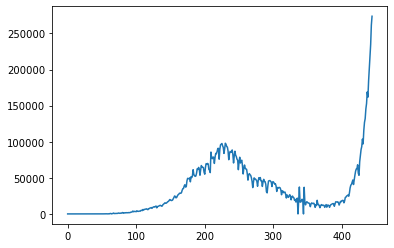

In [82]:
result_df.new_cases.plot()

In [83]:
result_df.set_index('date',inplace=True)

In [84]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.000725,NaN,NaN
2020-01-31,0.0,1.0,NaN,NaN,NaN,NaN,0.000725,NaN,NaN
2020-02-01,0.0,1.0,NaN,NaN,NaN,NaN,0.000725,NaN,NaN
2020-02-02,1.0,2.0,NaN,NaN,NaN,NaN,0.001449,NaN,NaN
2020-02-03,1.0,3.0,NaN,NaN,NaN,NaN,0.002174,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-04-14,200739.0,14074564.0,1038.0,173126.0,1411758.0,255245759.0,10198.927013,125.453225,184960.107210
2021-04-15,217353.0,14291917.0,1185.0,174311.0,1384549.0,256630308.0,10356.428686,126.311917,185963.400399
2021-04-16,234692.0,14526609.0,1341.0,175652.0,1473210.0,258103518.0,10526.494813,127.283654,187030.940485


In [85]:
result_df.loc['2021-04-18']

new_cases             2.738020e+05
total_cases           1.506180e+07
new_deaths            1.619000e+03
total_deaths          1.787720e+05
new_tests                      NaN
total_tests                    NaN
cases_per_million     1.091432e+04
deaths_per_million    1.295445e+02
tests_per_million              NaN
Name: 2021-04-18 00:00:00, dtype: float64

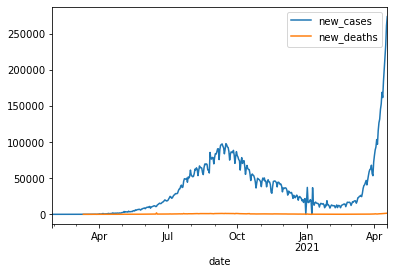

In [97]:
result_df.new_cases.plot(legend=True)
result_df.new_deaths.plot(legend=True)

In [88]:
result_df.new_deaths

date
2020-01-30       NaN
2020-01-31       NaN
2020-02-01       NaN
2020-02-02       NaN
2020-02-03       NaN
               ...  
2021-04-14    1038.0
2021-04-15    1185.0
2021-04-16    1341.0
2021-04-17    1501.0
2021-04-18    1619.0
Name: new_deaths, Length: 445, dtype: float64

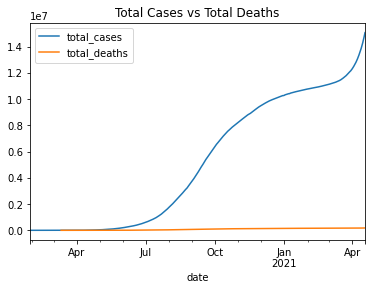

In [96]:
result_df.total_cases.plot(title='Total Cases vs Total Deaths',legend=True)
result_df.total_deaths.plot(legend=True)

In [91]:
death_rate = result_df.total_deaths / result_df.total_cases

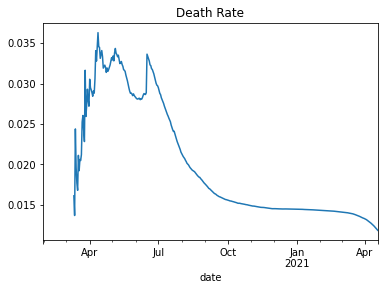

In [92]:
death_rate.plot(title='Death Rate')

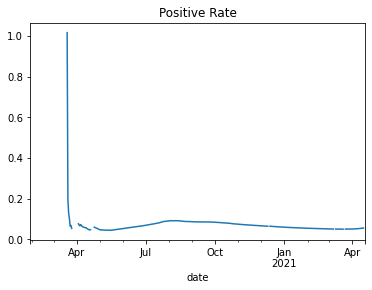

In [98]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate');

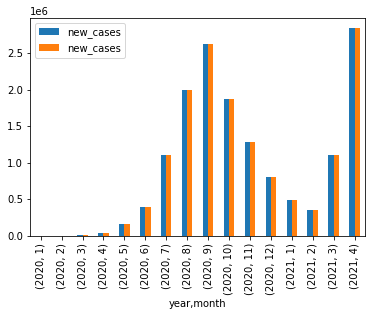

In [112]:
covid_df_month.new_cases.plot(kind='bar')

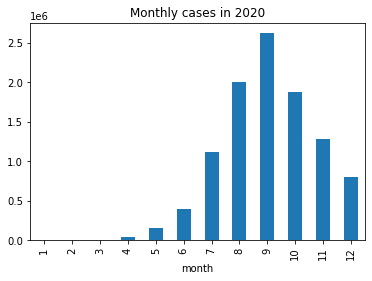

In [124]:
covid_df[covid_df.year==2020].groupby('month').new_cases.sum().plot(kind='bar',title='Monthly cases in 2020')

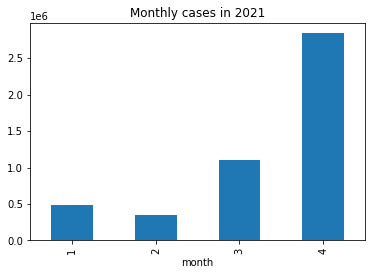

In [125]:
covid_df[covid_df.year==2021].groupby('month').new_cases.sum().plot(kind='bar',title='Monthly cases in 2021')